# A. Transformasi Data

In [3]:
#hal pertama yang dilakukan
import pandas as pd
import numpy as np
import scipy as sp

#plotting
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.insert(value=data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")

In [7]:
title_map={"Capt":"Officer",
          "Col":"Officer",
          "Major":"Officer",
          "Johkheer":"Royalty",
          "Don":"Royalty",
          "Sir":"Royalty",
          "Dr":"Royalty",
          "Rev":"Officer",
          "The Countess":"Royalty",
          "Dona":"Royalty",
          "Mme":"Mrs",
          "Mlle":"Miss",
          "Ms":"Mrs",
           "Mr":"Mr",
           "Mrs":"Mrs",
           "Miss":"Miss",
           "Master":"Master",
           "Lady":"Royalty" }

data["Title"]=data.Title.map(title_map)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:
#Cek jumlah dari masing-masing kelompok title. Berapa orang yang termasuk officer, royal, dan lainnya
#GAGAL

OTitle = data.loc[(data["Name"] == "Officer") & (data["Title"] == 1)]
RTitle = data.loc[(data["Name"] == "Royalty") & (data["Title"] == 1)]
MrsTitle = data.loc[(data["Name"] == "Mrs") & (data["Title"] == 1)]
MrTitle = data.loc[(data["Name"] == "Mr") & (data["Title"] == 1)]
MissTitle = data.loc[(data["Name"] == "Miss") & (data["Title"] == 1)]
MasterTitle = data.loc[(data["Name"] == "Master") & (data["Title"] == 1)]

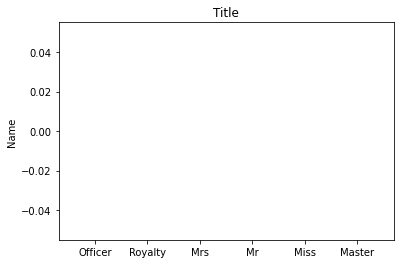

In [17]:
#Cek jumlah dari masing-masing kelompok title. Berapa orang yang termasuk officer, royal, dan lainnya
#GAGAL

objects = ('Officer', 'Royalty', 'Mrs', 'Mr', 'Miss', 'Master')
y_pos = np.arange(len(objects))
performance = [float(len(OTitle)),float(len(RTitle)),float(len(MrsTitle)),float(len(MrTitle)),float(len(MissTitle))
               ,float(len(MasterTitle))]
 
plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Name')
plt.title('Title')
 
plt.show()

In [18]:
#cara ini sebenernya rentan. karena data bernilai lebih dari 2

data['Title'] = pd.factorize(data.Title)[0]
data['Title'].unique()

array([ 0,  1,  2,  3,  4,  5, -1], dtype=int64)

In [19]:
data['Title'].replace(0, 'Officer',inplace=True)
data['Title'].replace(1, 'Royalty',inplace=True)
data['Title'].replace(2, 'Mrs',inplace=True)
data['Title'].replace(3, 'Mr',inplace=True)
data['Title'].replace(4, 'Miss',inplace=True)
data['Title'].replace(5, 'Master',inplace=True)
data['Title'].replace(-1, 'Siapenih',inplace=True)

Officer     517
Mrs         184
Royalty     127
Mr           40
Master       11
Miss         10
Siapenih      2
Name: Title, dtype: int64

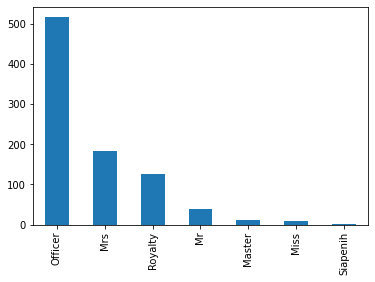

In [20]:
data['Title'].value_counts().plot(kind='bar')
data['Title'].value_counts()

In [21]:
data["Age"].isnull().sum()

177

In [23]:
def passenger_type (row):
    if row['Age'] < 2:
        return 'Infant'
    elif (row['Age'] >= 2 and row['Age'] < 12):
        return 'Child'
    elif (row['Age'] >= 12 and row['Age'] < 18):
        return 'Youth'
    elif (row['Age'] >= 18 and row['Age'] < 65):
        return 'Adult'
    elif row['Age'] >= 65:
        return 'Senior'
    elif row['Title'] == 'Master':
        return 'Child'
    elif row['Title'] == 'Miss':
        return 'Child'
    elif row['Title'] == 'Mr' or row['Title'] == 'Mrs':
        return 'Adult'
    else:
        return 'Unknown'
          
          

In [24]:
data['PassengerType'] = data.apply(lambda row: passenger_type(row), axis=1)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Officer,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Royalty,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mrs,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Royalty,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Officer,Adult


In [26]:
data['PassengerType'] = pd.factorize(data.Title)[0]
data['PassengerType'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [27]:
data['PassengerType'].replace(0, 'Infant',inplace=True)
data['PassengerType'].replace(1, 'Child',inplace=True)
data['PassengerType'].replace(2, 'Youth',inplace=True)
data['PassengerType'].replace(3, 'Adult',inplace=True)
data['PassengerType'].replace(4, 'Senior',inplace=True)
#2 ini ngawur
data['PassengerType'].replace(5, 'Unknown',inplace=True)
data['PassengerType'].replace(6, 'Siapenih',inplace=True)

Infant      517
Youth       184
Child       127
Adult        40
Unknown      11
Senior       10
Siapenih      2
Name: PassengerType, dtype: int64

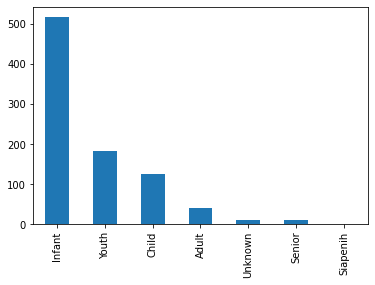

In [28]:
data['PassengerType'].value_counts().plot(kind='bar')
data['PassengerType'].value_counts()

In [29]:
#cara lain selain factorize

sex_map={"male":1, "female":0}
data["Sex"]=data["Sex"].map(sex_map)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Officer,Infant
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Royalty,Child
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mrs,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Royalty,Child
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Officer,Infant


In [32]:
#Coba lakukan mapping ini pada PassengerType
#Dengan aturan mapping sebagai berikut:
#Unknown : 0
#Infant : 1
#Child : 2
#Youth : 3
#Adult : 4
#Senior : 5

data['PassengerType'].replace(0, 'Unknown',inplace=True)
data['PassengerType'].replace(1, 'Infant',inplace=True)
data['PassengerType'].replace(2, 'Child',inplace=True)
data['PassengerType'].replace(3, 'Youth',inplace=True)
data['PassengerType'].replace(4, 'Adult',inplace=True)
data['PassengerType'].replace(5, 'Senior',inplace=True)



Infant      517
Youth       184
Child       127
Adult        40
Unknown      11
Senior       10
Siapenih      2
Name: PassengerType, dtype: int64

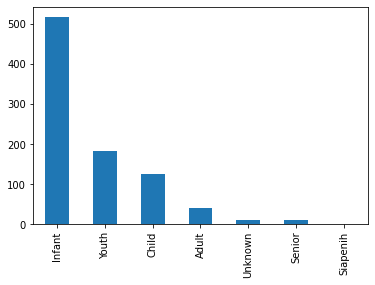

In [33]:
data['PassengerType'].value_counts().plot(kind='bar')
data['PassengerType'].value_counts()

In [34]:
#Cara selain mapping manual adalah menggunakan library sklearn

from sklearn import preprocessing

# B. Pemilihan Fitur/Attribut

In [35]:
#Berikut ini contoh hitung korelasi menggunakan pandas, dengan deafult adalah pearson correlation.

import seaborn as sns

In [36]:
#fungsi hitung korelasi

def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

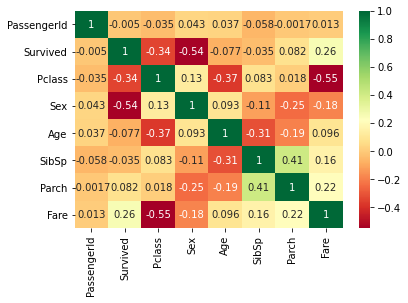

In [39]:
titanic_corr(data)

Coba hitung korelasi setelah atribut telah di-encoding. Apa maksud hasil korelasi tersebut?

Jawaban: Jika nilai dari korelasi tersebut semakin kecil, maka di drop tidak masalah. Jika bernilai minus, kemungkinan (survived) nya lebih kecil atau meninggal. Jika nilai korelasi tinggi tapi tetap ingin di hapus, nantinya akan berpengaruh jika nanti menggunakan decision tree. Maka dari itu dilakukan pemilihan fitur untuk mengurangi dimensi / kolom yang tidak perlu.


In [40]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [49]:
#menghapus atribut passengerId

#delattr(PassengerId, PassengerId)
#data.drop(["PassengerId"], inplace=True)
#data = data.drop('PassengerId')
#data = data.drop("PassengerId",axis=0)

del data['PassengerId']

Silahkan hapus atribut yang tidak anda gunakan dari data anda. Jelaskan mengapa anda menghapus atribut tersebut.

Jawabannya: Pada dataset ini atribut target adalah survived (variabel yang juga memiliki kontribusi untuk
selamat / tidaknya seseorang) Pada table korelasi tersebut yang memungkinkan untuk dihapus karena rendahnya
korelasi adalah atribut PassangerId

In [50]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
